## Iris Flower Classification using KNN classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.datasets import make_classification

In [84]:
df=pd.read_csv("IRIS.csv")

In [85]:
from sklearn.utils import shuffle
df_train, df_test= train_test_split(df, random_state=104, test_size=0.25, shuffle=True)

In [86]:
X_train=df_train[['sepal_length','sepal_width', 'petal_length','petal_width']]
X_test=df_test[['sepal_length','sepal_width', 'petal_length','petal_width']]
y_train=df_train['species']
y_test=df_test['species']


In [87]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
56,6.3,3.3,4.7,1.6
2,4.7,3.2,1.3,0.2
51,6.4,3.2,4.5,1.5
7,5.0,3.4,1.5,0.2
39,5.1,3.4,1.5,0.2
...,...,...,...,...
100,6.3,3.3,6.0,2.5
8,4.4,2.9,1.4,0.2
127,6.1,3.0,4.9,1.8
142,5.8,2.7,5.1,1.9


In [88]:
print(f'training set size X: {X_train.shape[0]} samples \ntest set size X: {X_test.shape[0]} samples')
print(f'training set size y: {y_train.shape[0]} samples \ntest set size y: {y_test.shape[0]} samples')

training set size X: 112 samples 
test set size X: 38 samples
training set size y: 112 samples 
test set size y: 38 samples


In [89]:
s_length=[]
for l in (X_train['sepal_length']):
    s_length.append(l)

In [90]:
p_length=[]
for l in (X_train['petal_length']):
    p_length.append(l)

In [91]:
s_width=[]
for i in (X_train['sepal_width']):
    s_width.append(l)

In [92]:
p_width=[]
for l in (X_train['petal_width']):
    p_width.append(l)

In [93]:
species=[]
for l in (y_train):
    species.append(l)

In [94]:
sep_length=np.array(s_length)
sep_width=np.array(s_width)
pet_length=np.array(p_length)
y=np.array(species)

In [95]:
class_setosa_pl = [p_length[i] for i in range(len(p_length)) if y[i] == 'Iris-setosa']
class_versi_pl = [p_length[i] for i in range(len(p_length)) if y[i] == 'Iris-versicolor']
class_virginica_pl = [p_length[i] for i in range(len(p_length)) if y[i] == 'Iris-virginica']

In [96]:
class_setosa_sl = [s_length[i] for i in range(len(s_length)) if y[i] == 'Iris-setosa']
class_versi_sl = [s_length[i] for i in range(len(s_length)) if y[i] == 'Iris-versicolor']
class_virginica_sl = [s_length[i] for i in range(len(s_length)) if y[i] == 'Iris-virginica']

In [97]:
class_setosa_sw = [s_width[i] for i in range(len(s_width)) if y[i] == 'Iris-setosa']
class_versi_sw = [s_width[i] for i in range(len(s_width)) if y[i] == 'Iris-versicolor']
class_virginica_sw = [s_width[i] for i in range(len(s_width)) if y[i] == 'Iris-virginica']

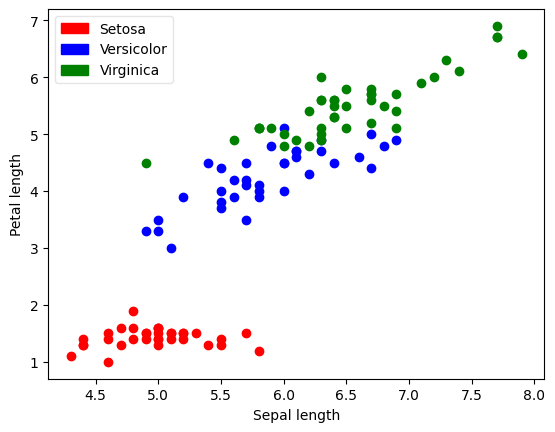

In [98]:
plt.scatter(class_setosa_sl, class_setosa_pl, c='r', label='Setosa')
plt.scatter(class_versi_sl, class_versi_pl, c='b', label='Versicolor')
plt.scatter(class_virginica_sl, class_virginica_pl, c='g', label='Virginica')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
setosa = mpatches.Patch(color='red', label='Setosa')
versi = mpatches.Patch(color='blue', label='Versicolor')
virginica = mpatches.Patch(color='green', label='Virginica')
plt.legend(handles=[setosa, versi, virginica], loc='upper left', framealpha=0.5, frameon=True)
plt.show()

In [99]:
def distance_ecu(x_train, x_test_point):
  distances= []
  for i in range(len(x_train)):
      current_train_point= x_train[i]
      current_distance= 0

      for j in range(len(current_train_point)):

          current_distance += (current_train_point[j] - x_test_point[j]) **2
      current_distance= np.sqrt(current_distance)

      distances.append(current_distance)
  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances

In [100]:
def nearest_neighbors(distance_point, K):

    df_nearest= distance_point.sort_values(by=['dist'], axis=0)
    df_nearest= df_nearest[:K]
    return df_nearest

In [101]:
def voting(df_nearest, y_train):
    counter_vote= Counter(y_train[df_nearest.index])
    y_pred= counter_vote.most_common()[0][0]
    return y_pred

In [102]:
def KNN_from_scratch(x_train, y_train, x_test, K):
    y_pred=[]

    for x_test_point in x_test:
      distance_point  = distance_ecu(x_train, x_test_point)
      df_nearest_point= nearest_neighbors(distance_point, K)
      y_pred_point    = voting(df_nearest_point, y_train)
      y_pred.append(y_pred_point)

    return y_pred

In [103]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)
from sklearn.preprocessing import Normalizer
scaler= Normalizer().fit(X_train)
normalized_x_train= scaler.transform(X_train)
normalized_x_test= scaler.transform(X_test)

In [104]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)
print(normalized_x_train.shape)
print(normalized_x_test.shape)

(112, 4)
(38, 4)
(38,)
(112,)
(112, 4)
(38, 4)


In [126]:
K=4
y_pred_scratch= KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_scratch)

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa']


In [127]:
df1=pd.DataFrame(y_pred_scratch, columns=['species predicted'])
df1

,species predicted
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-versicolor
4,Iris-virginica
5,Iris-versicolor
6,Iris-versicolor
7,Iris-virginica
8,Iris-versicolor
9,Iris-setosa


In [128]:
df2 = df_test.reset_index(drop=True)
df2.index=range(38)

In [129]:
df2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.4,3.4,1.5,0.4,Iris-setosa
1,5.7,3.8,1.7,0.3,Iris-setosa
2,5.4,3.7,1.5,0.2,Iris-setosa
3,5.6,2.9,3.6,1.3,Iris-versicolor
4,6.1,2.6,5.6,1.4,Iris-virginica
5,6.2,2.2,4.5,1.5,Iris-versicolor
6,6.5,2.8,4.6,1.5,Iris-versicolor
7,6.5,3.0,5.2,2.0,Iris-virginica
8,5.5,2.5,4.0,1.3,Iris-versicolor
9,5.0,3.2,1.2,0.2,Iris-setosa


In [130]:
df3=pd.merge(df2, df1, left_index=True, right_index=True)
df3

,sepal_length,sepal_width,petal_length,petal_width,species,species predicted
0,5.4,3.4,1.5,0.4,Iris-setosa,Iris-setosa
1,5.7,3.8,1.7,0.3,Iris-setosa,Iris-setosa
2,5.4,3.7,1.5,0.2,Iris-setosa,Iris-setosa
3,5.6,2.9,3.6,1.3,Iris-versicolor,Iris-versicolor
4,6.1,2.6,5.6,1.4,Iris-virginica,Iris-virginica
5,6.2,2.2,4.5,1.5,Iris-versicolor,Iris-versicolor
6,6.5,2.8,4.6,1.5,Iris-versicolor,Iris-versicolor
7,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica
8,5.5,2.5,4.0,1.3,Iris-versicolor,Iris-versicolor
9,5.0,3.2,1.2,0.2,Iris-setosa,Iris-setosa


In [131]:
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [132]:
df4=pd.DataFrame(y_pred_sklearn)
df4

,0
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-versicolor
4,Iris-virginica
5,Iris-versicolor
6,Iris-versicolor
7,Iris-virginica
8,Iris-versicolor
9,Iris-setosa


In [133]:
df_final=pd.merge(df3, df4, left_index=True, right_index=True)
df_final

,sepal_length,sepal_width,petal_length,petal_width,species,species predicted,0
0,5.4,3.4,1.5,0.4,Iris-setosa,Iris-setosa,Iris-setosa
1,5.7,3.8,1.7,0.3,Iris-setosa,Iris-setosa,Iris-setosa
2,5.4,3.7,1.5,0.2,Iris-setosa,Iris-setosa,Iris-setosa
3,5.6,2.9,3.6,1.3,Iris-versicolor,Iris-versicolor,Iris-versicolor
4,6.1,2.6,5.6,1.4,Iris-virginica,Iris-virginica,Iris-virginica
5,6.2,2.2,4.5,1.5,Iris-versicolor,Iris-versicolor,Iris-versicolor
6,6.5,2.8,4.6,1.5,Iris-versicolor,Iris-versicolor,Iris-versicolor
7,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica,Iris-virginica
8,5.5,2.5,4.0,1.3,Iris-versicolor,Iris-versicolor,Iris-versicolor
9,5.0,3.2,1.2,0.2,Iris-setosa,Iris-setosa,Iris-setosa


In [134]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_sklearn)

0.9736842105263158

In [136]:
def accuracy(nxtr, nxte, ytr,yte, k):
  knn=KNeighborsClassifier(k)
  knn.fit(nxtr, ytr)
  y_pred_sklearn= knn.predict(nxte)
  return accuracy_score(yte, y_pred_sklearn)

accuracy(normalized_x_train, normalized_x_test, y_train, y_test, 4)

0.9736842105263158

In [137]:
k_val_list=[i for i in range(1,38,1)]
acc=[]
for k in k_val_list:
  acc.append(accuracy(normalized_x_train, normalized_x_test, y_train, y_test, k))


In [138]:
acc

[1.0,
 0.9736842105263158,
 1.0,
 0.9736842105263158,
 1.0,
 0.9736842105263158,
 1.0,
 0.9736842105263158,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9736842105263158,
 1.0,
 0.9736842105263158]